Optional material
---

Code to plot the error surfaces from the unit

In [1]:
import numpy as np

# Cost functions
def MSE(y, y_pred):
    return np.mean(np.square(y-y_pred))

def MAE(y, y_pred):
    return np.mean(np.abs(y-y_pred))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 200
def plot_error_surface(cost_f, points, cost_label):
    # Create x-, y-axes corresponding to the a, b parameters
    x, y = points[:, 0], points[:, 1]
    a_axis = np.linspace(-10, 10, num=N)
    b_axis = np.linspace(-10, 10, num=N)
    
    # Create grid of NxN points on those axes
    a_grid, b_grid = np.meshgrid(a_axis, b_axis)

    # Compute their loss values for the set of data points
    cost_values = np.zeros(shape=(N, N), dtype=np.float)
    for idx_a in range(N):
        for idx_b in range(N):
            # Extract a, b values
            a, b = a_grid[idx_a, idx_b], b_grid[idx_a, idx_b]
            
            # Make predictions
            y_hat = a*x+b
            
            # Get loss value
            cost_values[idx_a, idx_b] = cost_f(y, y_hat)

    # Plot 3d surface
    plt.figure(figsize=(9, 7.5))
    ax = plt.gca(projection='3d')
    ax.set_xlabel('parameter a')
    ax.set_ylabel('parameter b')
    ax.set_zlabel(cost_label)
    surface = ax.plot_surface(a_grid, b_grid, cost_values, cmap=plt.cm.coolwarm)
    plt.show()

    # 2d error surface
    plt.contourf(a_grid, b_grid, cost_values, 20, cmap=plt.cm.coolwarm)
    plt.colorbar(label=cost_label)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('parameter a')
    plt.ylabel('parameter b')
    plt.show()

In [3]:
# Define a set of data points
points = np.array([[1, 2], [0, 1], [-1.5, 0]])

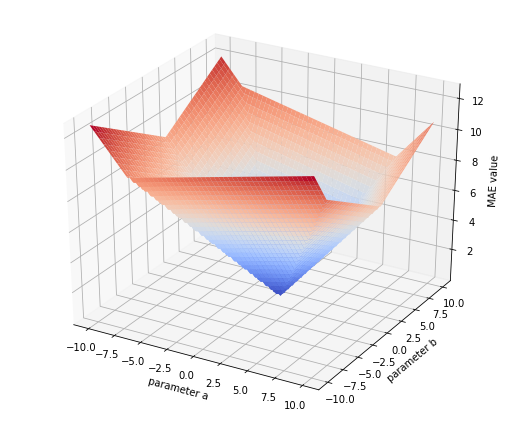

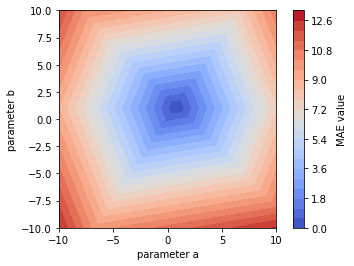

In [4]:
# MAE
plot_error_surface(MAE, points, 'MAE value')

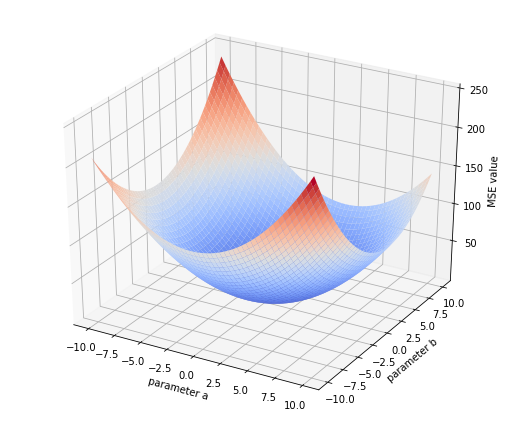

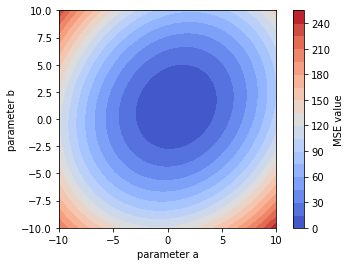

In [5]:
# MSE
plot_error_surface(MSE, points, 'MSE value')